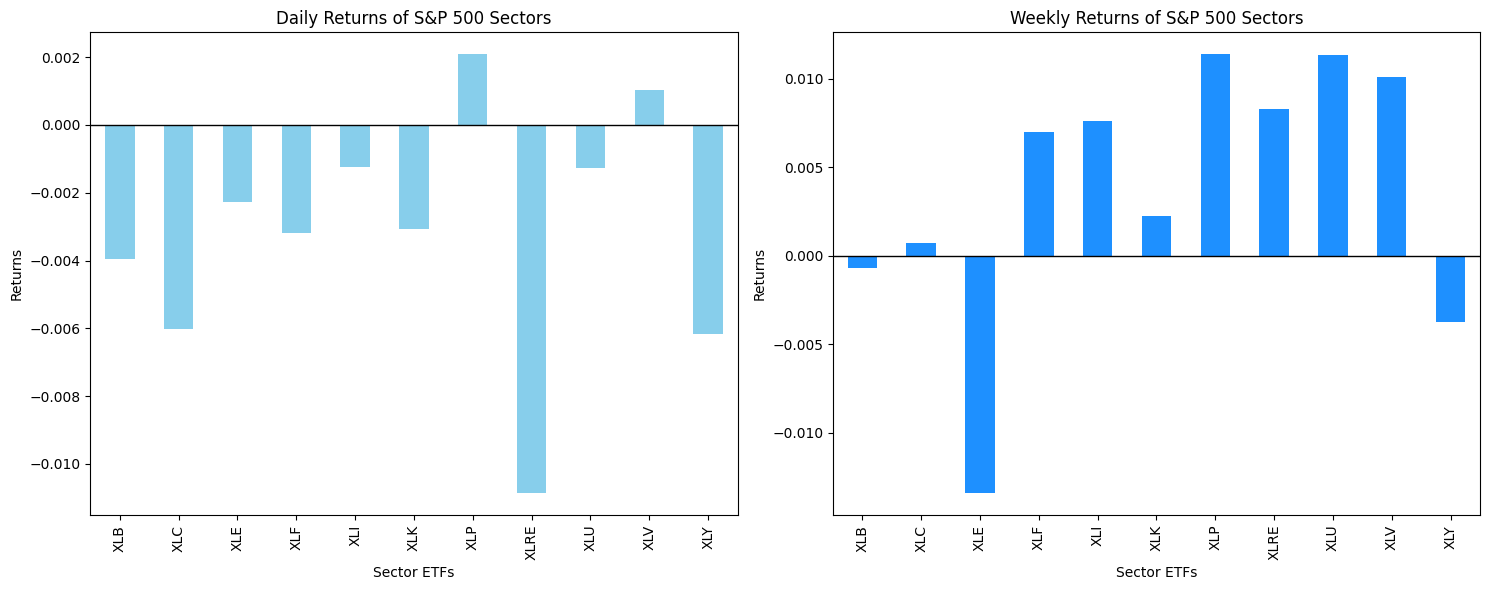

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# List of sector ETF symbols
sector_symbols = ['XLC', 'XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLU']

# Download historical data for each sector
data = yf.download(sector_symbols, start='2023-01-01', end='2024-01-01')

# Function to update and display daily and weekly returns bar graphs
def plot_returns():
    clear_output(wait=True)
    
    # Plotting daily returns
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    daily_returns = data['Adj Close'].pct_change().iloc[-1]
    daily_returns.plot(kind='bar', color='skyblue')
    plt.axhline(y=0, color='black', linestyle='-', linewidth=1)  # Solid line at y=0
    plt.title('Daily Returns of S&P 500 Sectors')
    plt.xlabel('Sector ETFs')
    plt.ylabel('Returns')
    
    # Plotting weekly returns
    plt.subplot(1, 2, 2)
    weekly_returns = data['Adj Close'].resample('W').ffill().pct_change().iloc[-1]
    weekly_returns.plot(kind='bar', color='dodgerblue')  # Darker shade of blue
    plt.axhline(y=0, color='black', linestyle='-', linewidth=1)  # Solid line at y=0
    plt.title('Weekly Returns of S&P 500 Sectors')
    plt.xlabel('Sector ETFs')
    plt.ylabel('Returns')
    
    plt.tight_layout()
    plt.show()

# Daily and weekly updates
for period in data.index.union(data.resample('W').last().index):
    plot_returns()
    time.sleep(1)  # Optional: Adjust sleep duration for display
